## Lending Club - EDA

In [171]:
# Libraries Imports
import pandas as pd

In [172]:
# Data Imports
loan_data = pd.read_csv("/Users/lvinjamuri/Desktop/AI- ML/Lending Club/loan/loan.csv")

C:\Users\lvinjamuri\AppData\Local\Temp\ipykernel_83044\322132611.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv("/Users/lvinjamuri/Desktop/AI- ML/Lending Club/loan/loan.csv")


In [173]:
# Set to display all the columns by changing the Pandas display option
pd.set_option("display.max_columns", 111)

# the number of missing items of all columns
pd.set_option("display.max_rows", None)

In [174]:

#drop all the columns (axis=1)
columns_to_drop = ['mths_since_last_delinq',
                   'mths_since_last_record', 
                   'next_pymnt_d', 
                   'num_bc_sats',
                   'mths_since_recent_bc',
                   'mths_since_recent_bc_dlq',
                   'mths_since_recent_inq',
                   'mths_since_recent_revol_delinq',
                   'num_accts_ever_120_pd',
                   'num_actv_bc_tl',
                   'num_actv_rev_tl',
                   'mort_acc',
                   'num_bc_tl',
                   'num_tl_op_past_12m',
                   'num_op_rev_tl',
                   'num_rev_accts',
                   'num_rev_tl_bal_gt_0',
                   'num_sats',
                   'num_tl_120dpd_2m',
                   'num_tl_30dpd',
                   'num_tl_90g_dpd_24m',
                   'pct_tl_nvr_dlq',
                   'percent_bc_gt_75',
                   'tot_hi_cred_lim',
                   'total_bal_ex_mort',
                   'mo_sin_rcnt_tl',
                   'num_il_tl',
                   'mo_sin_rcnt_rev_tl_op',
                   'verification_status_joint',
                   'mo_sin_old_il_acct',
                   'mths_since_last_major_derog',
                   'annual_inc_joint',
                   'dti_joint',
                   'total_bc_limit',
                   'tot_coll_amt',
                   'tot_cur_bal',
                   'open_acc_6m',
                   'open_il_6m',
                   'open_il_12m',
                   'open_il_24m',
                   'mths_since_rcnt_il',
                   'total_bal_il',
                   'il_util',
                   'open_rv_12m',
                   'open_rv_24m',
                   'max_bal_bc',
                   'all_util',
                   'total_rev_hi_lim',
                   'inq_fi',
                   'total_cu_tl',
                   'inq_last_12m',
                   'acc_open_past_24mths',
                   'avg_cur_bal',
                   'bc_open_to_buy',
                   'bc_util',
                   'mo_sin_old_rev_tl_op',
                   'total_il_high_credit_limit',
                   'id',
                   'url',
                   'member_id',
                   'zip_code',
                   'emp_title',
                   'desc',
                   'initial_list_status',
                   'policy_code',
                   'delinq_amnt',
                   'tax_liens',
                   'chargeoff_within_12_mths',
                   'acc_now_delinq',
                   'collections_12_mths_ex_med',
                   'title',
                   'out_prncp',
                   'collection_recovery_fee',
                   'sub_grade',
                   'pymnt_plan',
                   'earliest_cr_line',
                   'application_type',
                   'last_credit_pull_d',
                   'addr_state',
                   'funded_amnt',
                   'funded_amnt_inv',
                   'delinq_2yrs',
                   'inq_last_6mths',
                   'open_acc',
                   'revol_bal',
                   'out_prncp_inv',
                   'total_rec_late_fee',	
                   'recoveries',
                   'last_pymnt_d',
                   'last_pymnt_amnt',  
                   'total_pymnt_inv',
                   'total_acc',
                   'total_pymnt',
                   'total_rec_prncp',
                   'total_rec_int'

                   ]
final_loan_data  = loan_data.drop(columns_to_drop,axis=1)


In [175]:
(final_loan_data.isna().sum()*100)/len(final_loan_data)  # % of na values in columns

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
pub_rec                 0.000000
revol_util              0.125891
pub_rec_bankruptcies    1.754916
dtype: float64

In [176]:
# Drop all the na values in "emp_length" , "pub_rec_bankruptcies" and "revol_util"

final_loan_data = final_loan_data[final_loan_data['emp_length'].notna()]  
final_loan_data = final_loan_data[final_loan_data['revol_util'].notna()]
final_loan_data = final_loan_data[final_loan_data['pub_rec_bankruptcies'].notna()]

In [177]:
(final_loan_data.isna().sum()*100)/len(final_loan_data)  # % of na values in columns

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
pub_rec                 0.0
revol_util              0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [178]:
# Currently ongoing loans have no impact to our problem
current_loan_status = final_loan_data["loan_status"] !="Current"
final_loan_data = final_loan_data[current_loan_status]
final_loan_data.shape

(36800, 16)

In [179]:
# 'emp_length' remove -  >,< years
final_loan_data['emp_length'] = final_loan_data['emp_length'].replace('(\\d+)\\s*years', r'\1', regex=True)

final_loan_data['emp_length'] = final_loan_data['emp_length'].str.replace(r'\D+', '')


In [180]:
# 'issue_d' conversion into date format
final_loan_data['issue_d']  = pd.to_datetime(final_loan_data['issue_d'], format='%b-%y')

In [181]:
# 'term' column remove 'months 
# Convert into years
final_loan_data['term'] = final_loan_data['term'].replace('(\\d+)\\s*months',r'\1', regex=True ).astype(int)
final_loan_data['term'] = final_loan_data['term']/12

In [182]:
# int_rate column remove '%' and convert into float
final_loan_data['int_rate'] = final_loan_data['int_rate'].replace('(\\d)\\s*%',r'\1', regex=True).astype(float)

In [183]:
# Working dataframe
final_loan_data.head(5)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec,revol_util,pub_rec_bankruptcies
0,5000,3.0,10.65,162.87,B,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,0,83.70%,0.0
1,2500,5.0,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,0,9.40%,0.0
2,2400,3.0,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72,0,98.50%,0.0
3,10000,3.0,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,0,21%,0.0
5,5000,3.0,7.90,156.46,A,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,11.20,0,28.30%,0.0


In [184]:
final_loan_data.shape

(36800, 16)

In [185]:
final_loan_data.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
pub_rec                 0
revol_util              0
pub_rec_bankruptcies    0
dtype: int64

In [186]:
final_loan_data.dtypes

loan_amnt                        int64
term                           float64
int_rate                       float64
installment                    float64
grade                           object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
dti                            float64
pub_rec                          int64
revol_util                      object
pub_rec_bankruptcies           float64
dtype: object

In [187]:
final_loan_data[['loan_status','home_ownership']].value_counts()


loan_status  home_ownership
Fully Paid   RENT              15000
             MORTGAGE          14138
Charged Off  RENT               2667
Fully Paid   OWN                2318
Charged Off  MORTGAGE           2196
             OWN                 385
Fully Paid   OTHER                78
Charged Off  OTHER                18
Name: count, dtype: int64

In [188]:
final_loan_data.groupby(['loan_status'])[['term','int_rate','dti','annual_inc',]].median()

,term,int_rate,dti,annual_inc
loan_status,,,,
Charged Off,3.0,13.79,14.335,54000.0
Fully Paid,3.0,11.49,13.260,60000.0


In [189]:
final_loan_data.groupby(['home_ownership'])[['loan_status']].count()

,loan_status
home_ownership,
MORTGAGE,16334
OTHER,96
OWN,2703
RENT,17667


In [190]:
final_loan_data.groupby(['loan_status','home_ownership', ]).size().reset_index(name='counts')

,loan_status,home_ownership,counts
0,Charged Off,MORTGAGE,2196
1,Charged Off,OTHER,18
2,Charged Off,OWN,385
3,Charged Off,RENT,2667
4,Fully Paid,MORTGAGE,14138
5,Fully Paid,OTHER,78
6,Fully Paid,OWN,2318
7,Fully Paid,RENT,15000


In [191]:
final_loan_data.groupby(['loan_status','term', ]).size().reset_index(name='counts')

,loan_status,term,counts
0,Charged Off,3.0,2943
1,Charged Off,5.0,2323
2,Fully Paid,3.0,24603
3,Fully Paid,5.0,6931


In [192]:

final_loan_data.groupby(['loan_status', ])["int_rate"].median().reset_index(name='Median Intrest %')

,loan_status,Median Intrest %
0,Charged Off,13.79
1,Fully Paid,11.49


In [193]:

final_loan_data.groupby(['loan_status', ])["loan_amnt"].median().reset_index(name='Median Loan')

,loan_status,Median Loan
0,Charged Off,10000.0
1,Fully Paid,9600.0


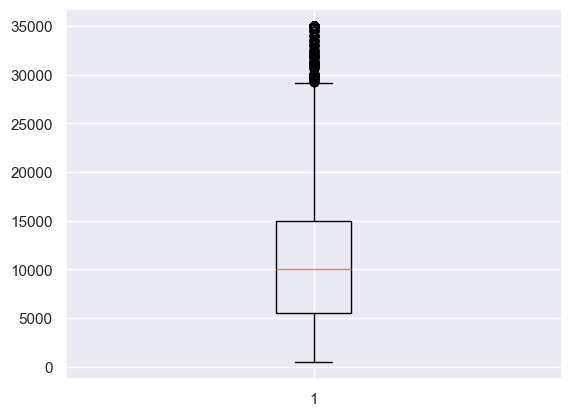

Median salary for loan applicants Rs: 10000.0


In [194]:
import matplotlib.pyplot as plot
import seaborn as sea


plot.boxplot(final_loan_data['loan_amnt'])
plot.show()
print("Median salary for loan applicants Rs:", final_loan_data['loan_amnt'].median())


----------------------------------------------------------------------------------------------------------------------------

## 1. Uni Variate Analysis

- Purpose of the loan

<Axes: ylabel='purpose'>

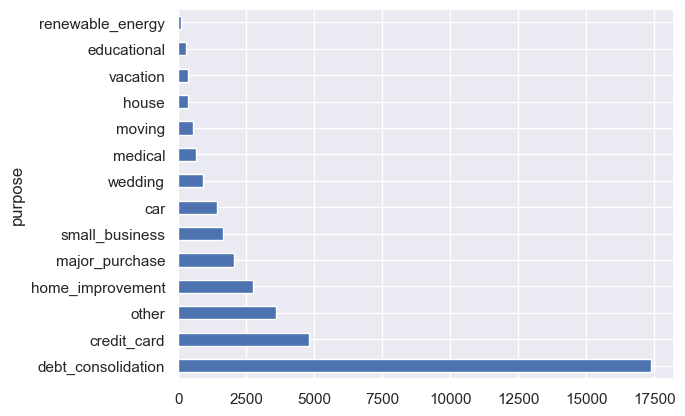

In [195]:
final_loan_data['purpose'].value_counts().plot.barh()

- Loan Amount

1. Median loan amount: 10000.0
2. Largest loan amount: 35000
3. Smallest loan amount: 500


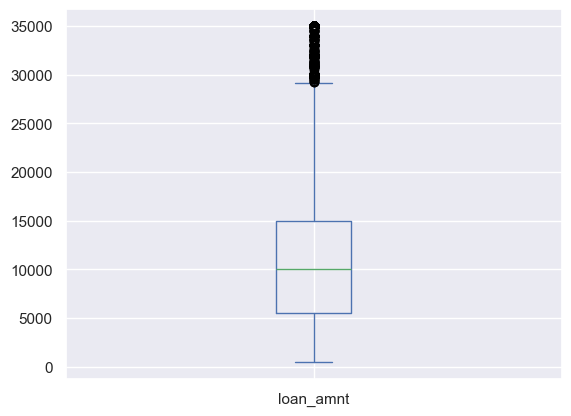

In [196]:
# Loan Amount

final_loan_data['loan_amnt'].plot.box()
print("1. Median loan amount:",final_loan_data['loan_amnt'].median())
print("2. Largest loan amount:",final_loan_data['loan_amnt'].max())
print("3. Smallest loan amount:",final_loan_data['loan_amnt'].min())

-  Intrest rate

1. Median intrest rate: 11.83
2. Max intrest rate: 24.4
3. Smallest intrest rate: 5.42


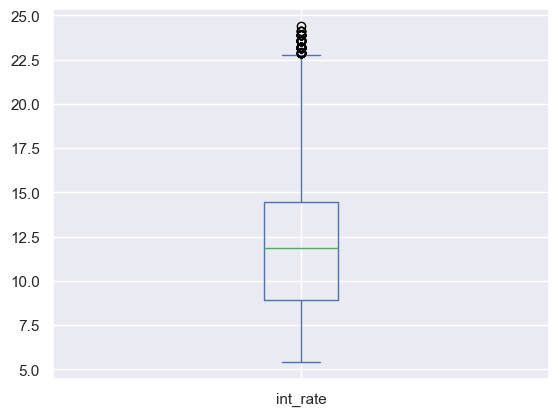

In [197]:
final_loan_data['int_rate'].plot.box()
print("1. Median intrest rate:",final_loan_data['int_rate'].median())
print("2. Max intrest rate:",final_loan_data['int_rate'].max())
print("3. Smallest intrest rate:",final_loan_data['int_rate'].min())

- Annual Income  

In [198]:
final_loan_data = final_loan_data[ final_loan_data['annual_inc'] <=35000.0 ]  # Filtering out the outliers - customers with high incomes

1. Median Annual income: 28500.0
2. Max Annual income: 35000.0
3. Smallest Annual income: 4000.0


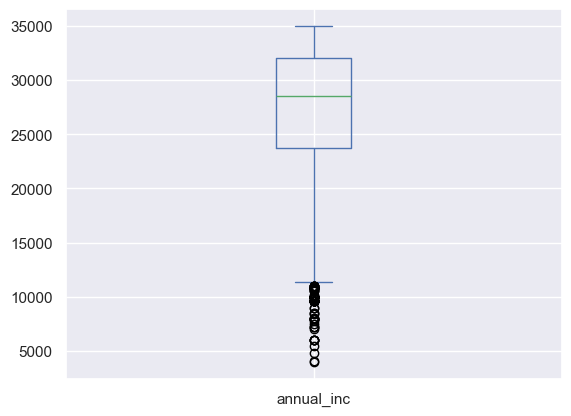

In [199]:
final_loan_data['annual_inc'].plot.box()
print("1. Median Annual income:",final_loan_data['annual_inc'].median())
print("2. Max Annual income:",final_loan_data['annual_inc'].max())
print("3. Smallest Annual income:",final_loan_data['annual_inc'].min())

## 2. BI Variate Analysis

Segmenting ordered categorical columns and ordered quantitative columns into discreete buckets for easy analysis

In [205]:
import seaborn as sns


In [206]:
# Bucket DTI
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile

final_loan_data['dti_b'] = final_loan_data.apply(lambda x : bucket_dti(x.dti), axis = 1)

In [207]:
# Bucketing interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile

final_loan_data['int_rate_b'] = final_loan_data.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)

Text(0.5, 1.0, 'Loan Status by DTI Bin')

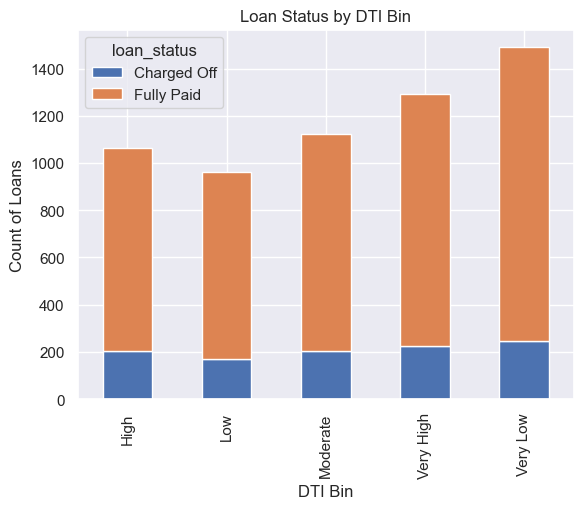

In [233]:
# Bucketed DTI rate vs Loan Status

# Group the data by interest rate bin and loan status
grouped_dti = final_loan_data.groupby(['dti_b', 'loan_status']).size().unstack()

# Plot the stacked bar chart
ax = grouped_dti.plot(kind='bar', stacked=True)

# Add labels and title
ax.set_xlabel('DTI Bin')
ax.set_ylabel('Count of Loans')
ax.set_title('Loan Status by DTI Bin')


Text(0.5, 1.0, 'Loan Status by Interest Rate Bin')

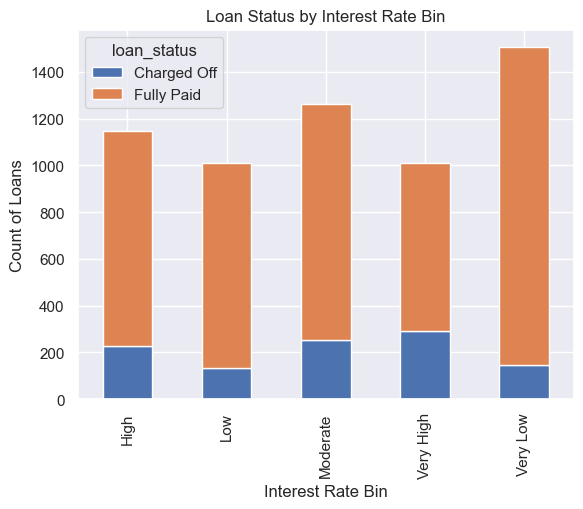

In [227]:
# Bucketed Intrest rate vs Loan Status

# Group the data by interest rate bin and loan status
grouped_intrest = final_loan_data.groupby(['int_rate_b', 'loan_status']).size().unstack()

# Plot the stacked bar chart
ax = grouped_intrest.plot(kind='bar', stacked=True)

# Add labels and title
ax.set_xlabel('Interest Rate Bin')
ax.set_ylabel('Count of Loans')
ax.set_title('Loan Status by Interest Rate Bin')


- Annual income Vs Loan Status

<Axes: xlabel='loan_status', ylabel='annual_inc'>

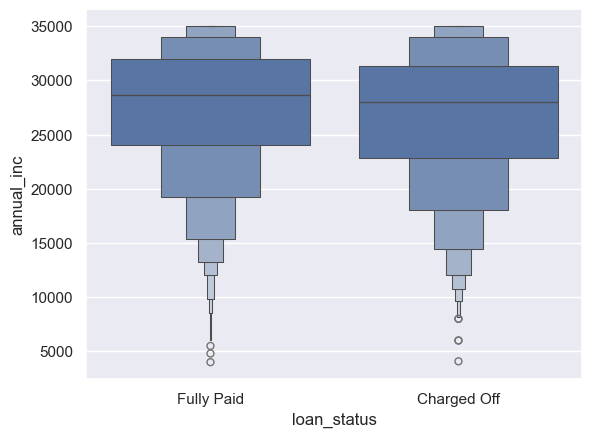

In [ ]:
sns.boxenplot(data=final_loan_data, x='loan_status', y='annual_inc')

- Conclusion - Majority of loan defaults are happennig in the case of applicants whose annual income < 20000


--------------------------------------------------------------------------------------------

#### We can infer that lower value loans has a higher probability of being charged off.
#### Especially true for loan amounts between 2500 to 7500 with the average loan amount being 5000

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

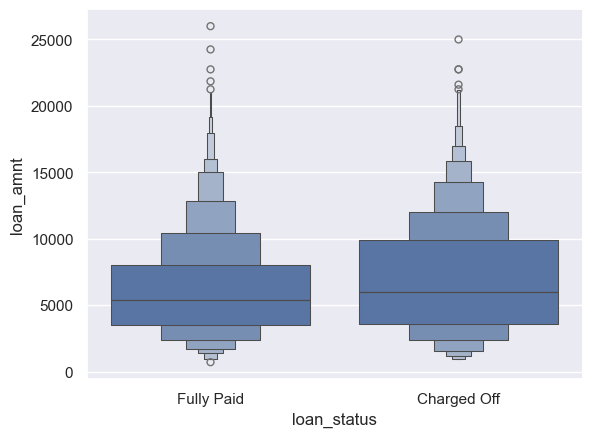

In [ ]:
sns.boxenplot(data=final_loan_data, x='loan_status', y='loan_amnt')

<Axes: xlabel='loan_status', ylabel='installment'>

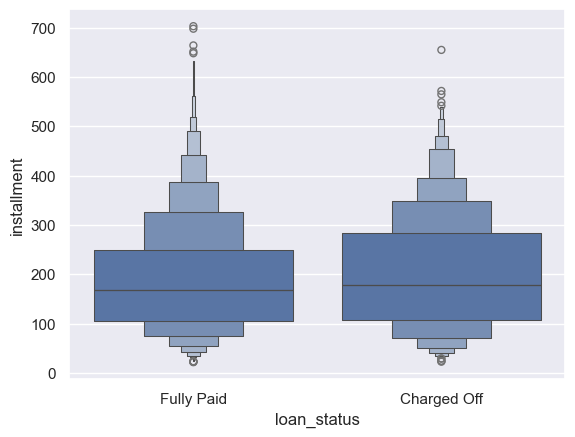

In [ ]:
sns.boxenplot(data=final_loan_data, x='loan_status', y='installment')

<Axes: xlabel='loan_status', ylabel='home_ownership'>

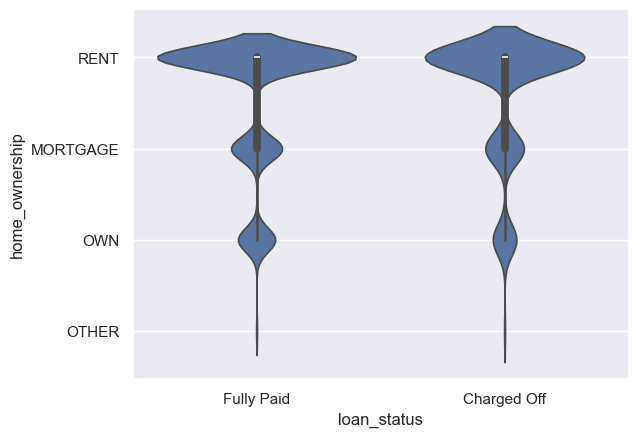

In [ ]:
sns.violinplot(data=final_loan_data, x='loan_status', y='home_ownership')

Text(0, 0.5, 'Purpose of Loan')

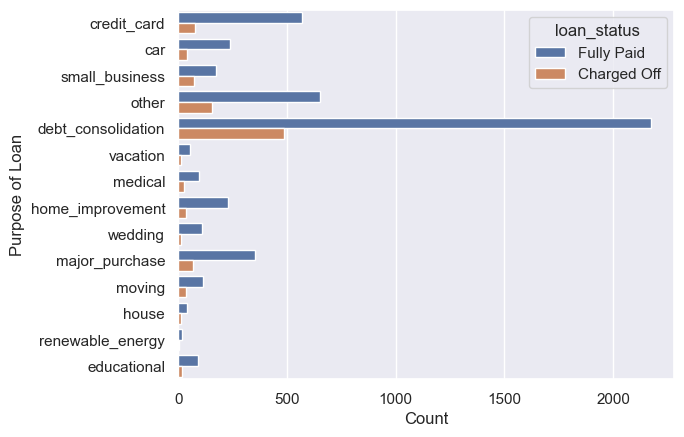

In [221]:
# Create the plot
g = sns.countplot(data=final_loan_data, y='purpose', hue='loan_status')

# Add labels and title
g.set_xlabel('Count')
g.set_ylabel('Purpose of Loan')
#plot.title('Loan Status by Purpose of Loan and Loan Amount')


<Axes: xlabel='count', ylabel='grade'>

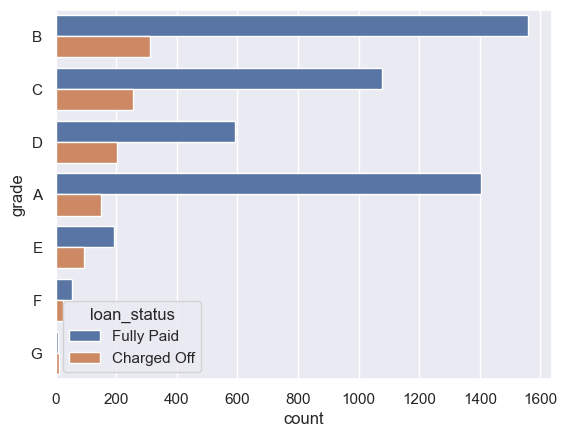

In [224]:
sns.countplot(data=final_loan_data, y='grade', hue='loan_status')

Find coorelation between the most impacted factors from the lessions drawn from previous analysis

All the factors given below has strong corelation with Loan status

- Loan Amount
- Term of the loan
- Intrest Rate
- Installment amount
- DTI
- Annual Income

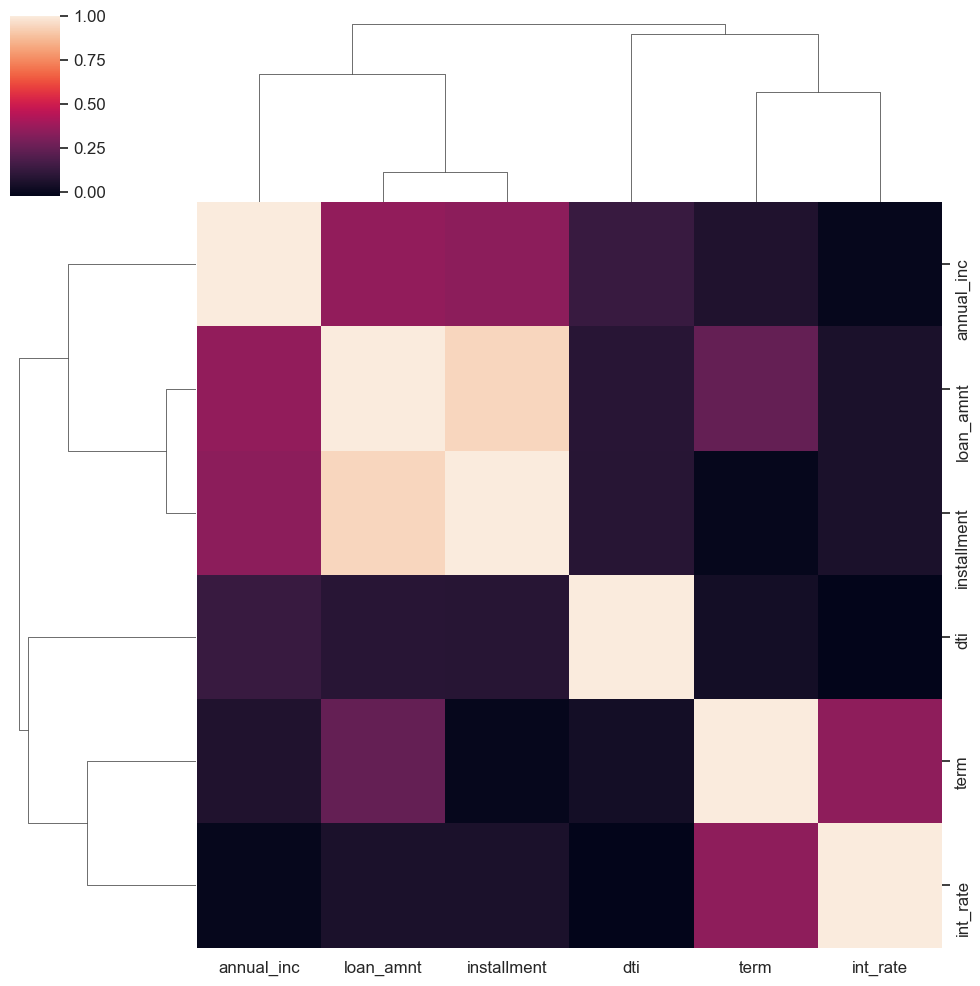

In [244]:
corr_loan = final_loan_data[['loan_amnt','term','int_rate','installment','dti','annual_inc']]
corr = corr_loan.corr() # calculate corelations between important quantative features
sea.clustermap(corr)